# Logistic Regression and KNN Algorithm to classify Iris flowers

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics

In [9]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris['data'],columns = iris['feature_names'])
df_iris['target'] = iris['target']

In [10]:
# Here, I have selected only two classes 0 and 1
df_iris = df_iris[df_iris.target != 2]

In [11]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
iris_model = LogisticRegression(max_iter=1000)

In [13]:
X = df_iris.iloc[:,[0,1]] #Sepal length and width for X
y = df_iris['target'] #The target variable

In [14]:
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) #Splitting train and test data

In [16]:
iris_model.fit(X_train, y_train) #Training the model

LogisticRegression(max_iter=1000)

In [23]:
lr_prediction = iris_model.predict(X_test)
print("Accuracy of logistic regression model is: ", metrics.accuracy_score(lr_prediction, y_test))

Accuracy of logistic regression model is:  1.0


/home/bakeyed/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/tmp/ipykernel_911/1846593084.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolors='k', marker='x', label='Test Data')


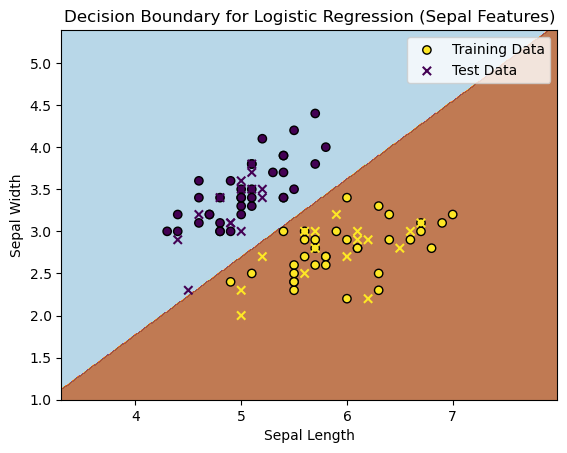

In [18]:
# Plotting the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = iris_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', marker='o', label='Training Data')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolors='k', marker='x', label='Test Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision Boundary for Logistic Regression (Sepal Features)')
plt.legend()
plt.show()

Accuracy:  1.0


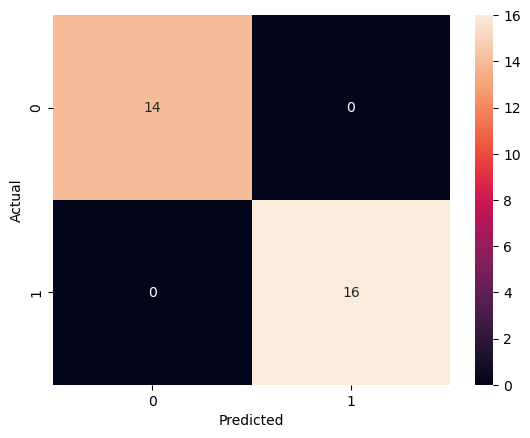

In [19]:
y_pred = iris_model.predict(X_test)
#Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [22]:
# Fit the KNN model
knn_model.fit(X_train, y_train)

# Make predictions
knn_prediction = knn_model.predict(X_test)
print("Accuracy of KNN model is: ", metrics.accuracy_score(knn_prediction, y_test))

Accuracy of KNN model is:  1.0


/home/bakeyed/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/tmp/ipykernel_911/3888879405.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolors='k', marker='x', label='Test Data')


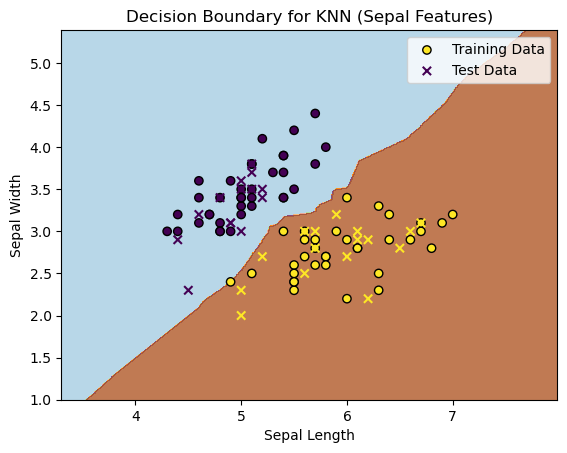

In [31]:
# Plotting the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot contour
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', marker='o', label='Training Data')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolors='k', marker='x', label='Test Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Decision Boundary for KNN (Sepal Features)')
plt.legend()
plt.show()